# Outcome Analysis

***

## Project Description

1. Since the most recent changes went live at the end of June 7th, how many students have accessed the site?

2. I had an email from the Student Support Team at UAN – apparently their students are having problems with the site? Can you see if there’s a particular problem there please?

3. The previous claim journey was time-consuming, and a lot of students were abandoning it partway through. Are we seeing fewer 'abandoned' claims, and has the average interaction time for a successful, completed claim journey now dropped?

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("login.csv", parse_dates=['Date'])

In [3]:
df

,Date,ID,University,Duration,Timedout,DocumentsUploaded,Filesize,Submission
0,2019-01-05,6563,TSU,1:38:17,No,0,0.00,No
1,2019-01-05,23287,RU,0:50:44,Yes,0,0.00,No
2,2019-01-05,82074664,ILU,1:03:12,Yes,4,13.82,Yes
3,2019-01-05,426932,Le Dean College,0:36:27,Yes,1,12.94,Yes
4,2019-01-05,42189,RU,0:47:21,No,2,9.26,Yes
...,...,...,...,...,...,...,...,...
5842,2019-06-14,2119467307,Guardian College,1:10:28,No,10,17.14,Yes
5843,2019-06-14,24515,RU,1:14:41,No,7,18.00,Yes
5844,2019-06-14,372221,Le Dean College,0:22:31,No,5,16.57,Yes
5845,2019-06-14,36347917,ILU,0:49:05,No,4,20.00,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5847 non-null   datetime64[ns]
 1   ID                 5847 non-null   int64         
 2   University         5847 non-null   object        
 3   Duration           5847 non-null   object        
 4   Timedout           5847 non-null   object        
 5   DocumentsUploaded  5847 non-null   int64         
 6   Filesize           5847 non-null   float64       
 7   Submission         5847 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 365.6+ KB


In [5]:
df.describe()

,ID,DocumentsUploaded,Filesize
count,5847.00,5847.00,5847.00
mean,815545694.35,1.87,5.91
std,2038957502.37,2.51,7.19
min,12.00,0.00,0.00
25%,47984.00,0.00,0.00
50%,3314383.00,1.00,1.03
75%,248406265.00,3.00,12.82
max,9999723813.00,15.00,20.29


In [6]:
df.columns

Index(['Date', 'ID', 'University', 'Duration', 'Timedout', 'DocumentsUploaded', 'Filesize', 'Submission'], dtype='object')

### Groupby Function

In [7]:
df.groupby("Date").sum()

,ID,DocumentsUploaded,Filesize
Date,,,
2019-01-05,96613835381,142,567.87
2019-01-06,109307902860,122,475.23
2019-02-05,135802894894,172,670.99
2019-02-06,103279079097,116,458.31
2019-03-05,106741078253,135,441.99
2019-03-06,163579778254,153,614.74
2019-04-05,83337620784,148,491.41
2019-04-06,99245585360,154,603.43
2019-05-05,86988807117,136,438.35


In [8]:
df.groupby("Timedout").sum()

,ID,DocumentsUploaded,Filesize
Timedout,,,
No,2637704686666,8262,24726.30
Yes,2130790988220,2681,9811.04


In [9]:
df.groupby("Submission").sum()

,ID,DocumentsUploaded,Filesize
Submission,,,
No,2306565264601,0,0.00
Yes,2461930410285,10943,34537.34


## Data Visualization

### Univariate Data Exploration

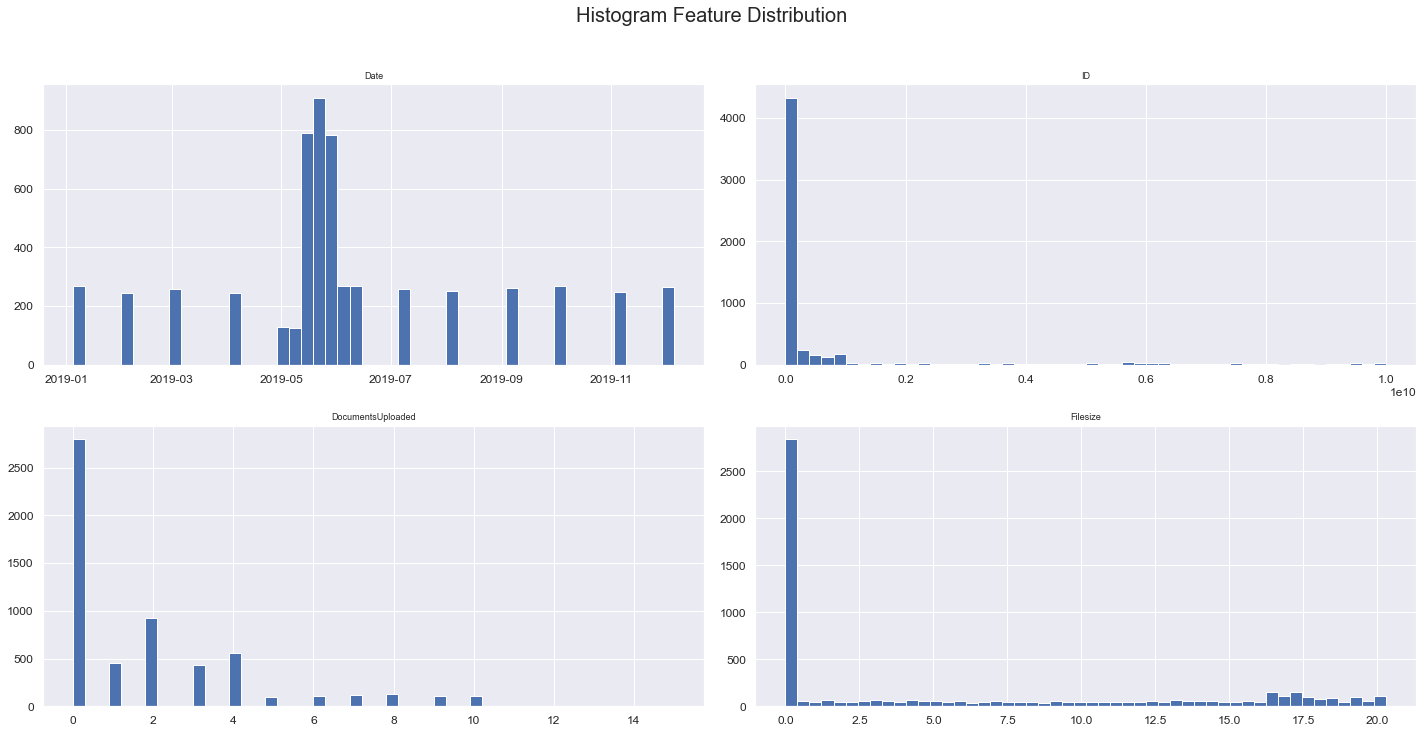

In [10]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

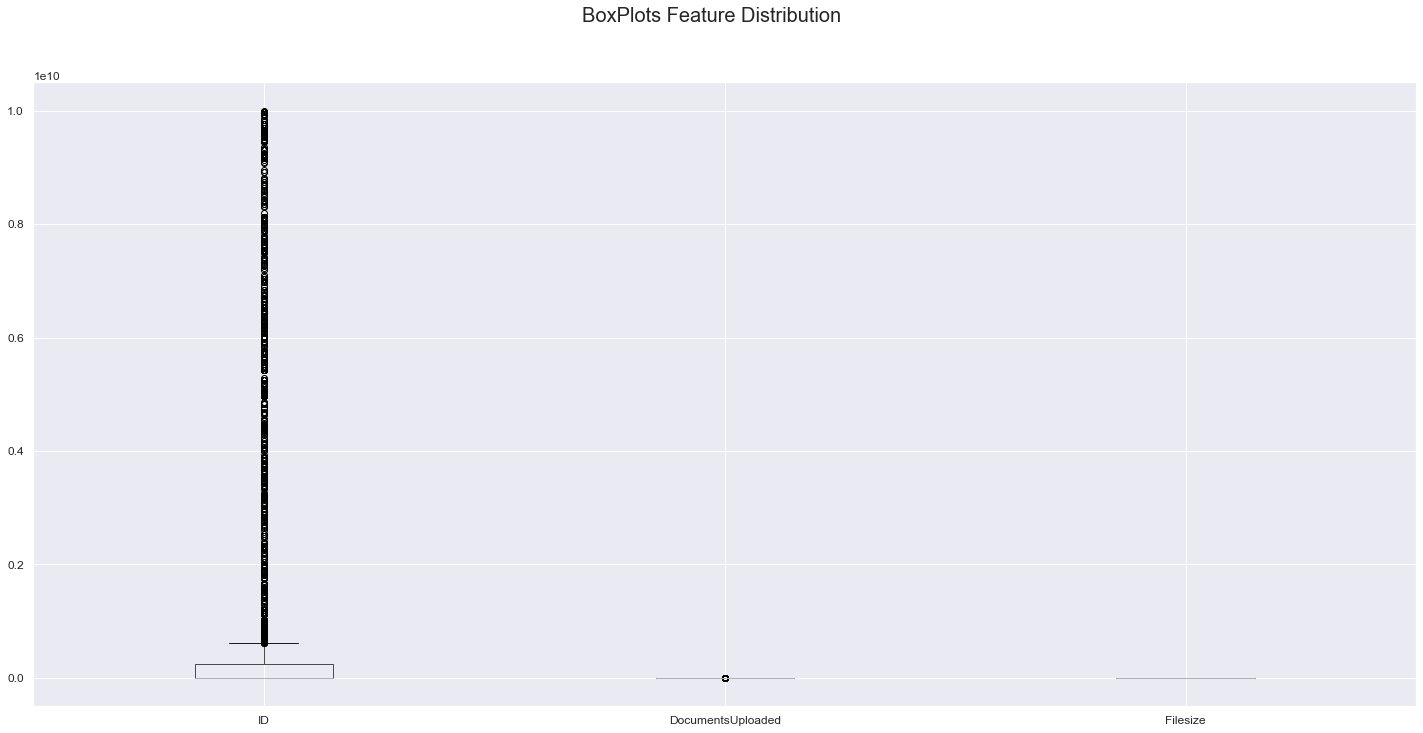

In [11]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

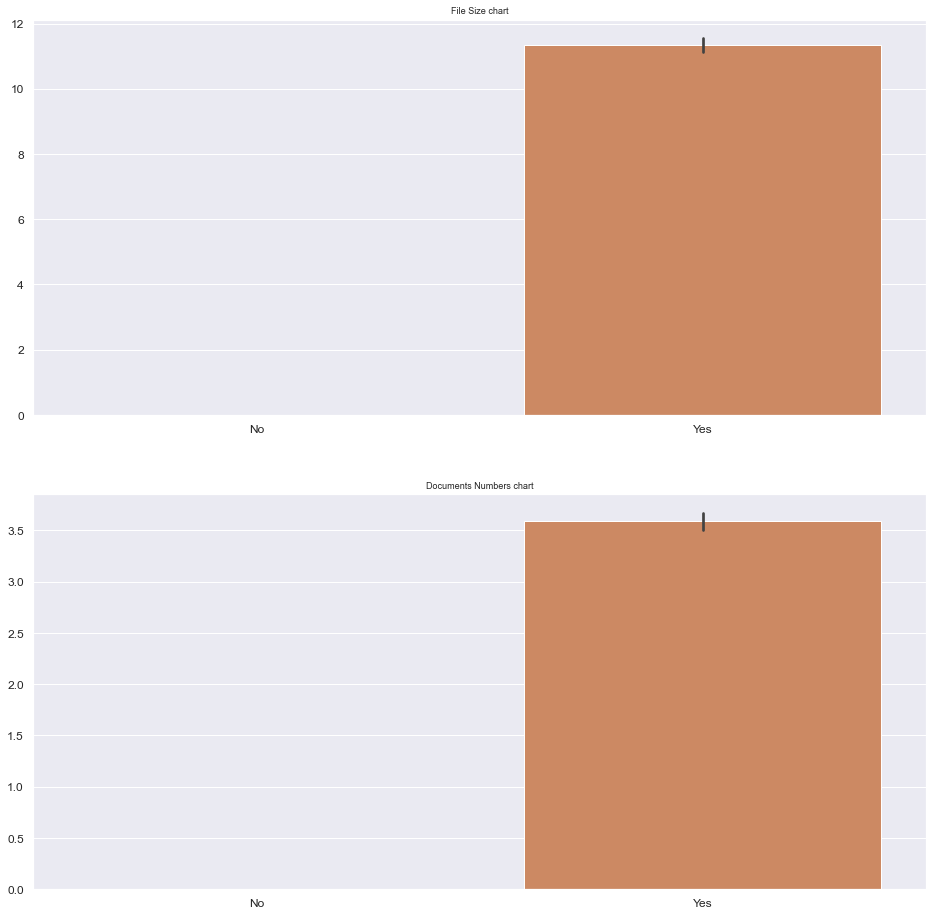

In [14]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.barplot(x="Submission", y="Filesize", data=df, ax=ax[0])
ax[0].set_title('File Size chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="Submission", y="DocumentsUploaded", data=df, ax=ax[1])
ax[1].set_title('Documents Numbers chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

## Time-Series Analysis

In [15]:
df.columns

Index(['Date', 'ID', 'University', 'Duration', 'Timedout', 'DocumentsUploaded', 'Filesize', 'Submission'], dtype='object')

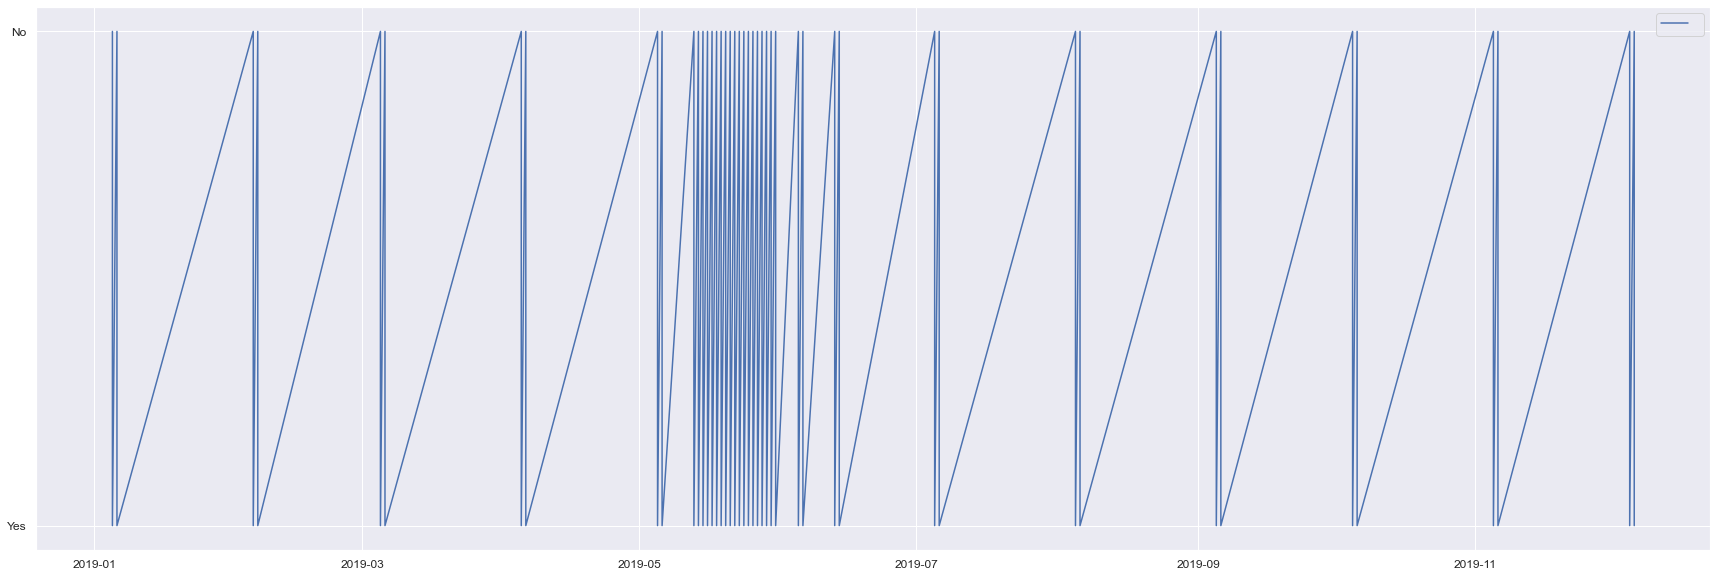

In [16]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date,y=df.Timedout, data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

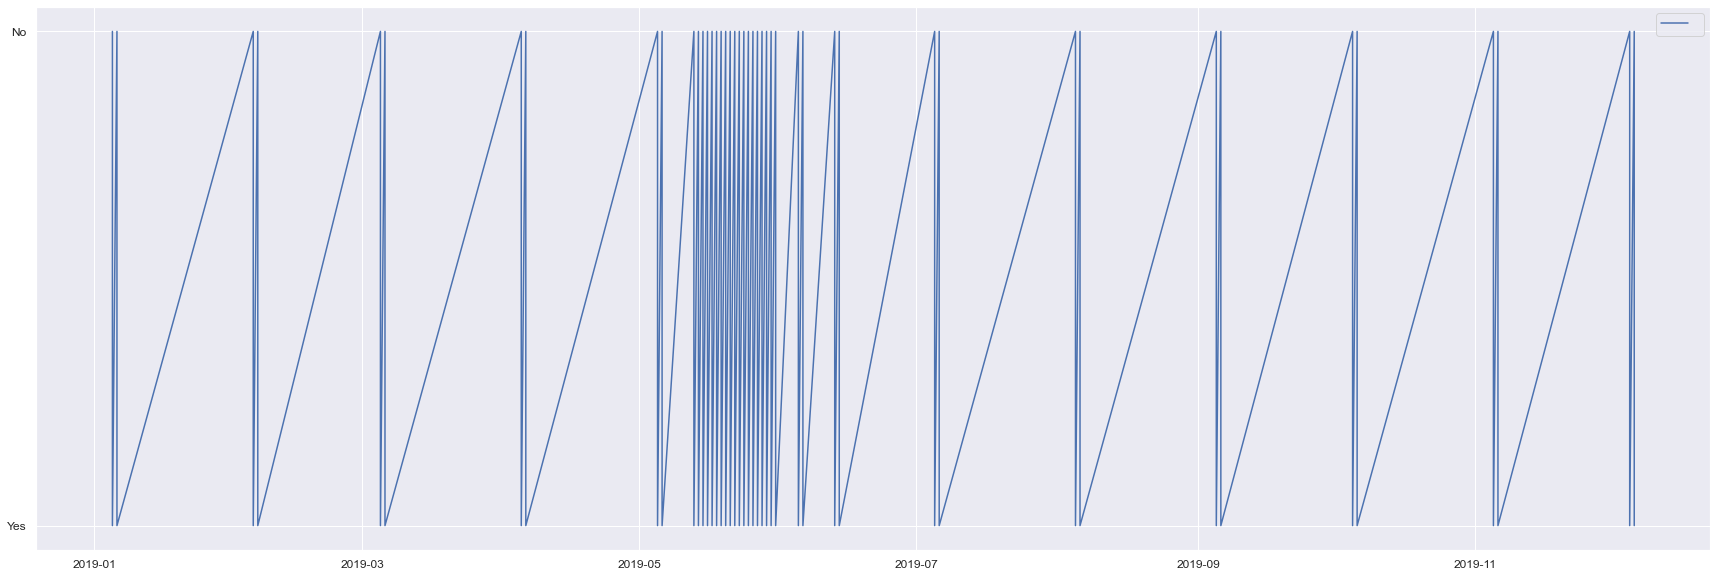

In [17]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date, y=df.Submission, data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

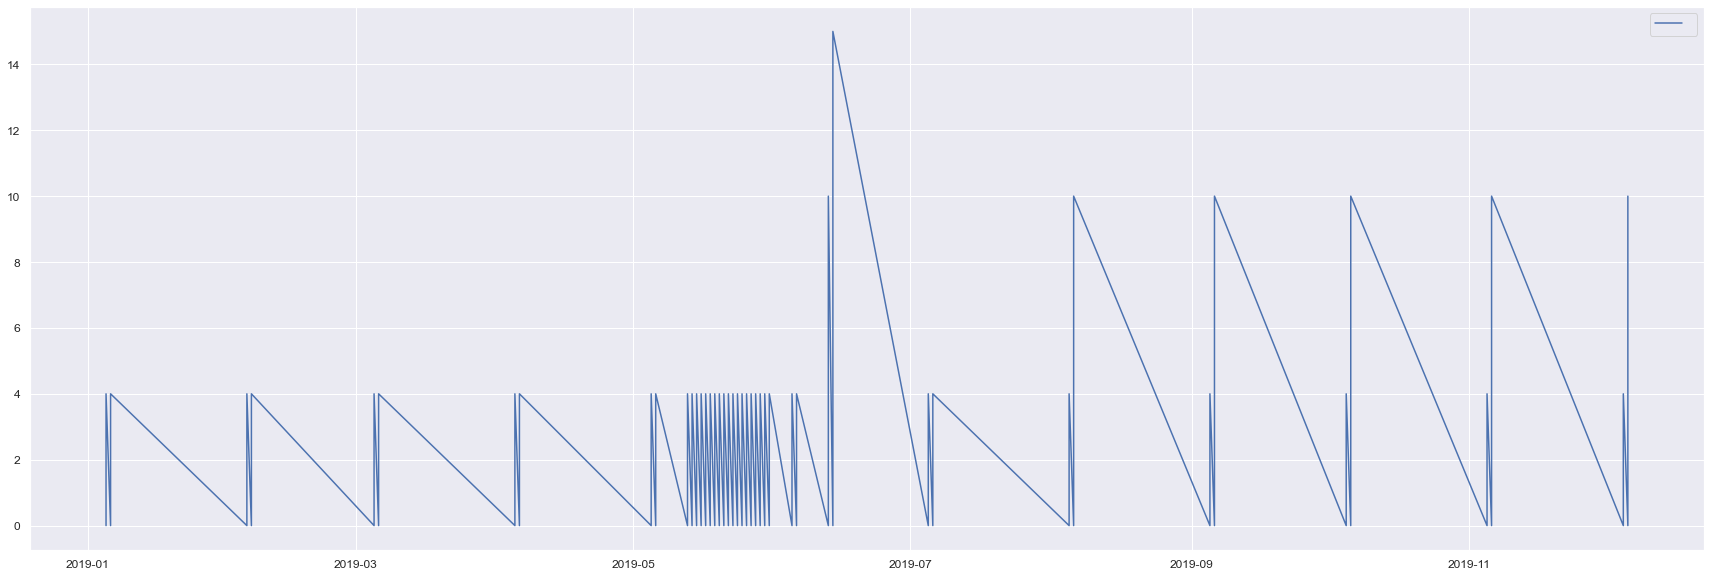

In [18]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date,y=df.DocumentsUploaded,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

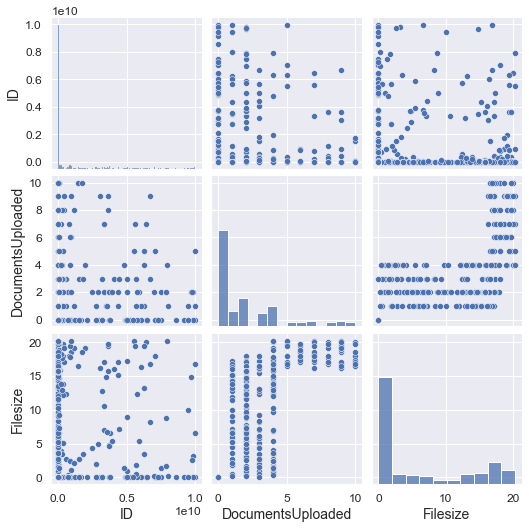

In [19]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

### Correlation

In [20]:
df.corr()

,ID,DocumentsUploaded,Filesize
ID,1.00,-0.00,-0.01
DocumentsUploaded,-0.00,1.00,0.80
Filesize,-0.01,0.80,1.00


#### Python code done by Dennis Lam